# 4th Semester Software Engineering Assignments

#### Write a program to calculate effort using Norden with replay graph

###################   Norden formula   ###################

Required effort at time t, E= 0.36544 PM




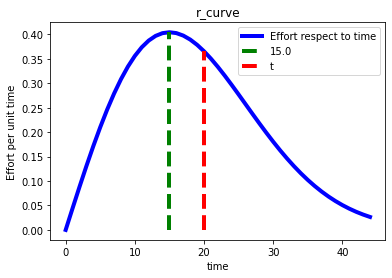

In [1]:
import matplotlib.pyplot as plt


def nordan(k, td, t):
    p = 2 * (pow(td, 2))
    q = pow(t, 2)
    r = pow(2.7182, (-q / p))
    return (k / pow(td, 2)) * t * r


def nordan_relay_graph(k, td, t):
    project_duration = 3 * int(td)
    y = [round(nordan(k, td, time), 5) for time in range(0, project_duration)]

    plt.plot(y, color="blue", linewidth=4, label="Effort respect to time")
    plt.vlines(
        x=td,
        ymin=0,
        ymax=round(nordan(k, td, td), 5),
        color="green",
        linestyle="dashed",
        linewidth=4,
        label=td,
    )
    plt.vlines(
        x=t,
        ymin=0,
        ymax=round(nordan(k, td, t), 5),
        color="red",
        linestyle="dashed",
        linewidth=4,
        label="t",
    )
    plt.legend(loc="upper right")
    plt.xlabel("time")
    plt.ylabel("Effort per unit time")
    plt.title("r_curve")
    plt.show()


if __name__ == "__main__":
    k = float(input("Enter area under the curve(k): "))
    td = float(input("Enter the maximum value of curve(td): "))
    t = float(input("Enter effort time(t) in month: "))

    print("\nRequired effort at time t is, E=",
          round(nordan(k, td, t), 5), "PM\n\n")
    nordan_relay_graph(k, td, t)


#### Write a program to the product size using Putnam with replay graph

For tc: 2, the Product size id 314.98026247371826


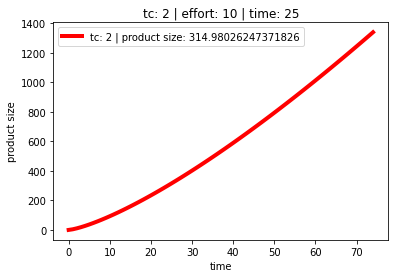

For tc: 8, the Product size id 1259.921049894873


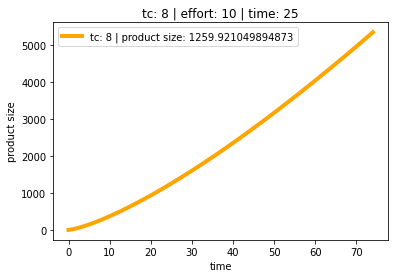

For tc: 11, the Product size id 1732.3914436054504


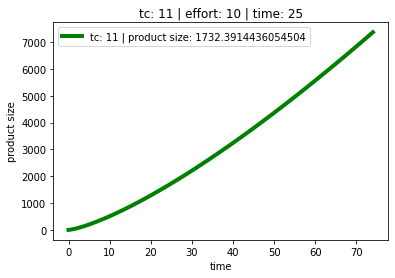

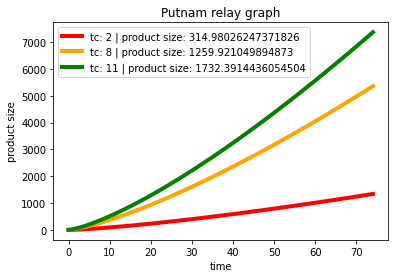

In [9]:
import matplotlib.pyplot as plt

tcs = [2, 8, 11]
colors = {
  2: 'red',
  8: 'orange',
  11: 'green'
}



def putnam(tc, effort, time):
  return tc * pow(effort, 1/3) * pow(time, 4/3)


def putnam_relay_graph(tc, effort, time):
  project_duration = 3 * int(time)
  y = [round(putnam(tc, effort, _time), 5) for _time in range(0, project_duration)]

  plt.plot(y, color=colors[tc], linewidth=4,
           label=f"tc: {tc} | product size: {putnam(tc, effort, time)}")
  plt.legend(loc="upper left")
  plt.xlabel("time")
  plt.ylabel("product size")
  plt.title(f"tc: {tc} | effort: {effort} | time: {time}")
  plt.show()

def putnam_relay_graph_all(effort, time):
  project_duration = 3 * int(time)
  for tc in tcs:
    y = [round(putnam(tc, effort, _time), 5) for _time in range(0, project_duration)]

    plt.plot(y, color=colors[tc], linewidth=4,
           label=f"tc: {tc} | product size: {putnam(tc, effort, time)}")
  plt.legend(loc="upper left")
  plt.xlabel("time")
  plt.ylabel("product size")
  plt.title(f"Putnam relay graph")
  plt.show()





if __name__ == "__main__":
  effort = int(
      input("Enter effort(developers) need to develop the software: "))
  time = int(input("Enter estimated time for develop a software(in months): "))

  for record in tcs:
      product_size = putnam(record, effort, time)
      print(f"For tc: {record}, the Product size id {product_size}")
      putnam_relay_graph(record, effort, time)
  putnam_relay_graph_all(effort, time)

#### Write a program to the product size using Jensen with replay graph


The product size(L) is =  407.16264 KLOC


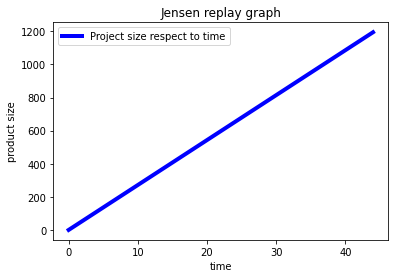

In [14]:
import matplotlib.pyplot as plt


def jensen(c, t, k):
    L = c * t * pow(k, 1 / 3)
    return L


def jensen_relay_graph(c, t, k):
    project_duration = 3 * int(t)
    y = [round(jensen(c, time, k), 5) for time in range(0, project_duration)]

    plt.plot(y, color="blue", linewidth=4,
             label="Project size respect to time")
    plt.legend(loc="upper left")
    plt.xlabel("time")
    plt.ylabel("product size")
    plt.title("Jensen replay graph")
    plt.show()


if __name__ == "__main__":
    c = float(input("Enter the effective technology  constant: "))
    t = float(input("Enter the development time: "))
    k = float(input("Enter the effort needed to develop: "))
    print("\nThe product size(L) is = ", round(jensen(c, t, k), 5), "KLOC")
    jensen_relay_graph(c, t, k)


#### Write a program to calculate cost and tdev using COCOMO – 1

In Organic Mode
Effort: 3586.1324 PM
Time: 56.0658 months
Average person required: 63.9629 persons
Productivity: 0.2942 KLOC/PM


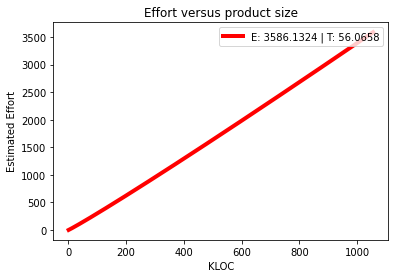

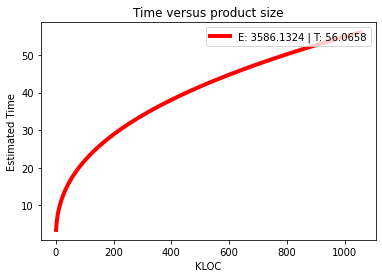



In Semi Detached Mode
Effort: 7297.3304 PM
Time: 56.2403 months
Average person required: 129.7527 persons
Productivity: 0.1446 KLOC/PM


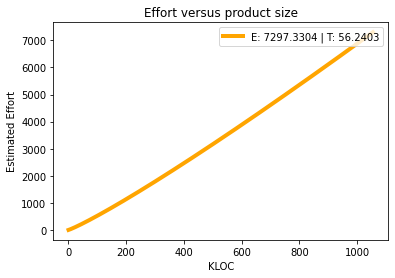

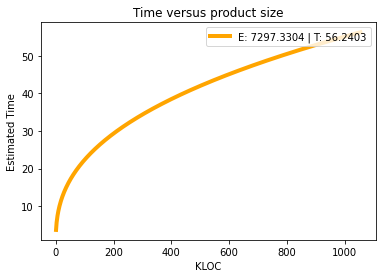



In Embedded Mode
Effort: 15282.8888 PM
Time: 54.5614 months
Average person required: 280.1044 persons
Productivity: 0.069 KLOC/PM


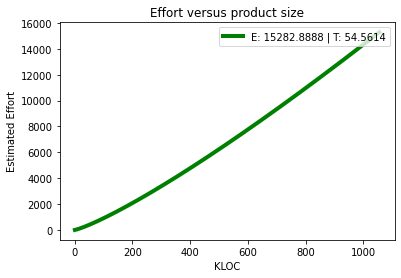

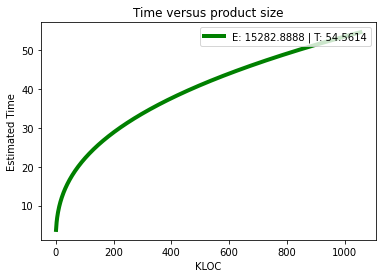

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


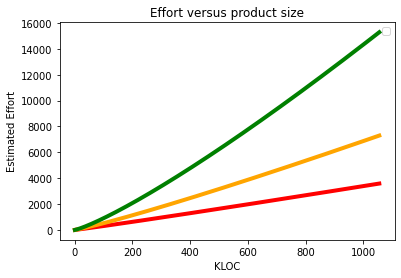

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


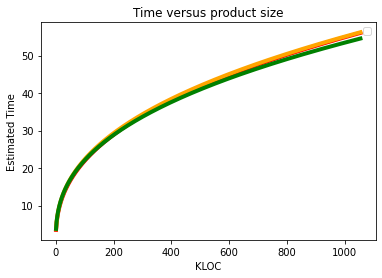

In [17]:
import matplotlib.pyplot as plt
kloc = int(input("Enter total number of lines of code(KLOC): "))

colors = {
    0: 'red',
    1: 'orange',
    2: 'green'
}
effort = 0


def relay_graph_effort(a, b, c, d, kloc, color):
  effort, time = cocomo(a, b, c, d, kloc, 0)
  effortArr = []
  klocArr = []
  klocnew = kloc + 10
  for i in range(1, kloc + 1):
    effortArr.append(cocomo(a, b, c, d, i, 1))
    klocArr.append(i)

  plt.plot(klocArr, effortArr,
           color=colors[color], linewidth=4, label=f"E: {effort} | T: {time}")
  draw_curve(1)
  return effortArr
  # print(effortArr)
  # print(klocArr)


def relay_graph_time(a, b, c, d, kloc, color):
  effort, time = cocomo(a, b, c, d, kloc, 3)
  timeArr = []
  klocArr = []
  klocnew = kloc + 10
  for i in range(1, kloc + 1):
    timeArr.append(cocomo(a, b, c, d, i, 2))
    klocArr.append(i)

  plt.plot(klocArr, timeArr, color=colors[color],
           linewidth=4, label=f"E: {effort} | T: {time}")
  draw_curve(0)
  return timeArr


def draw_curve(flag):
  plt.legend(loc="upper right")
  plt.xlabel("KLOC")
  if flag == 1:
    plt.ylabel("Estimated Effort")
    plt.title("Effort versus product size")
  else:
    plt.ylabel("Estimated Time")
    plt.title("Time versus product size")
  plt.show()
  print("\n")


def cocomo(a, b, c, d, kloc, flag):

  effort = round((a * pow(kloc, b)), 4)
  time = round((c * pow(effort, d)), 4)
  personRequired = round((effort / time), 4)
  productivity = round((kloc / effort), 4)
  if flag == 1:
    return effort
  if flag == 2:
    return time
  if flag == 3:
    return effort, time
  print("Effort: " + str(effort) + " PM")
  print("Time: " + str(time) + " months")
  print("Average person required: " + str(personRequired) + " persons")
  print("Productivity: " + str(productivity) + " KLOC/PM")
  return effort, time


effortArr = []
klocArr = []
timeArr = []
for i in range(0, 3):
  if(i == 0):
    print("In Organic Mode")
    effortArr.append(relay_graph_effort(2.4, 1.05, 2.5, 0.38, kloc, 0))
    timeArr.append(relay_graph_time(2.4, 1.05, 2.5, 0.38, kloc, 0))
  elif(i == 1):
    print("In Semi Detached Mode")
    effortArr.append(relay_graph_effort(3.0, 1.12, 2.5,	0.35, kloc, 1))
    timeArr.append(relay_graph_time(3.0, 1.12, 2.5,	0.35, kloc, 1))
  elif(i == 2):
    print("In Embedded Mode")
    effortArr.append(relay_graph_effort(3.6, 1.20,	2.5,	0.32, kloc, 2))
    timeArr.append(relay_graph_time(3.6, 1.20,	2.5,	0.32, kloc, 2))
for i in range(1, kloc + 1):
    klocArr.append(i)

for i in range(0, 3):
    plt.plot(klocArr, effortArr[i], color=colors[i], linewidth=4)
    i += 1
draw_curve(1)

for i in range(0, 3):
  plt.plot(klocArr, timeArr[i], color=colors[i], linewidth=4)
  i += 1
draw_curve(0)


#### Intermediate Cocomo Model

In [ ]:
import matplotlib.pyplot as plt

kloc = int(input("Enter total number of lines of code: \n"))
constants = []

colors = {
    0: 'red',
    1: 'orange',
    2: 'green'
}
effort = 0

required_software_reliability = [0.75, 0.88, 1.00, 1.15, 1.40]
size_of_application_database = [0, 0.94, 1.00, 1.08, 1.16]
complexity_of_the_product = [0.70, 0.85, 1.00, 1.15, 1.30]
runtime_performance_constraints = [0, 0, 1.00,	1.11,	1.30]
memory_constraints = [0, 0, 1.00, 1.06, 1.21]
volatility_of_the_virtual_machine_environment = [0, 0.87, 1.00, 1.15, 1.30]
required_turnabout_time = [0, 0.94, 1.00, 1.07, 1.15]
analyst_capability = [1.46, 1.19, 1.00, 0.86, 0.71]
applications_experience = [1.29, 1.13, 1.00, 0.91, 0.82]
software_engineer_capability = [1.42,	1.17,	1.00,	0.86,	0.70]
virtual_machine_experience = [1.21,	1.10,	1.00,	0.90, 0]
programming_language_experience = [1.14,	1.07,	1.00,	0.95, 0]
application_of_software_engineering_methods = [1.24, 1.10, 1.00, 0.91, 0.82]
# Intermediate Cocomo Model oftware_tools =	[1.24,	1.10,	1.00,	0.91, 0.83]
use_of_s
required_development_schedule = [1.23,	1.08,	1.00,	1.04,	1.10]

informations = ["Select Required Software Reliability: ",
                "Select Size of Application Database(Select between Low to Very High): ",
                "Select Complexity of The Product: ",
                "Select Runtime Performance Constraints(Select between Nominal to Very High): ",
                "Select Memory Constraints(Select between Nominal to Very High): ",
                "Select Volatility of the virtual machine environment(Select between Low to Very High): ",
                "Select Required turnabout time(Select between Low to Very High): ",
                "Select Analyst capability: ",
                "Select Applications experience: ",
                "Select Software engineer capability: ",
                "Select Virtual machine experience(Select between Very Low to High): ",
                # Intermediate Cocomo Model         "Select Programming language experience(Select between Very Low to High): ",
                "Select Application of software engineering methods: ",
                "Select Use of software tools: ",
                "Select Required development schedule: "
                ]


def selectConstants(option, value):
  if option == 0:
      constants.append(required_software_reliability[value])
  elif option == 1:
      constants.append(size_of_application_database[value])
  elif option == 2:
      constants.append(complexity_of_the_product[value])
  elif o  # Intermediate Cocomo Model ption == 3:
  constants.append(runtime_performance_constraints[value])
  elif option == 4:
      constants.append(memory_constraints[value])
  elif option == 5:
      constants.append(volatility_of_the_virtual_machine_environment[value])
  elif option == 6:
      constants.append(required_turnabout_time[value])
  elif option == 7:
      constants.append(analyst_capability[value])
  elif option == 8:
      constants.append(applications_experience[value])
  elif option == 9:
      constants.append(software_engineer_capability[value])
  elif o  # Intermediate Cocomo Model ption == 10:
  constants.append(virtual_machine_experience[value])
  elif option == 11:
      constants.append(programming_language_experience[value])
  elif option == 12:
      constants.append(application_of_software_engineering_methods[value])
  elif option == 13:
      constants.append(use_of_software_tools[value])
  elif option == 14:
      constants.append(required_development_schedule[value])


def relay_graph_effort(a, b, kloc, color, EAF):
  effort = cocomo(a, b, kloc, 0, EAF)
  effortArr = []
  klocArr = []
  klocnew = kloc + 10
  for i in range(1, kloc + 1):
    effortArr.append(cocomo(a, b, i, 1, EAF))
    klocArr.append(i)

  plt.plot(klocArr, effortArr,
           color=colors[color], linewidth=4, label=f"E: {effort}")
  draw_curve(1)
  return effortArr
  # print(effortArr)
  # print(klocArr)


def draw_curve(flag):
  plt.legend(loc="upper right")
  plt.xlabel("KLOC")
  if flag == 1:
    plt.ylabel("Estimated Effort")
    plt.title("Effort versus product size")
  else:
    plt.ylabel("Estimated Time")
    plt.title("Time versus product size")
  plt.show()
  print("\n")


def cocomo(a, b, kloc, flag, EAF):
  effort = round((a * pow(kloc, b)), 4) * EAF
  # time = round((c * pow(effort,d)), 4)
  # personRequired = round((effort / time), 4)
  # productivity = round((kloc / effort),4)
  if flag == 1:
    return effort
  # if f# Intermediate Cocomo Model lag == 2:
  #   return time
  # if flag == 2:
    # return effort,time
  print("Effort: " + str(effort) + " PM")
  # print("Time: " + str(time) + " months")
  # print("Average person required: " + str(personRequired) + " persons")
  # print("Productivity: " + str(productivity) + " KLOC/PM")
  # return effort,
  return effort


EAF = 1
for i in range(0, 15):

  print("\n")
  print("Very Low- Press 0\nLow - Press 1\nNominal - Press 2\nHigh - Press 3\nVery High - Press 4")
  flag = int(input(informations[i]))
  select  # Intermediate Cocomo Model Constants(i,flag)

print("----------------------------------------------------------------------\n")
for i in constants:
    EAF = EAF * i

print("Effort Adjustment Factor: " + str(EAF) + "\n")
effortArr = []
klocArr = []
timeArr = []
for i in range(0, 3):
  if(i == 0):
    print("In Organic Mode")
    effortArr.append(relay_graph_effort(3.2, 1.05, kloc, 0, EAF))
    # timeArr.append(relay_graph_time(2.4,1.05,2.5,0.38,kloc, 0))
  elif(i == 1):
    print("In Semi Detached Mode")
    effortArr.append(relay_graph_effort(3.0, 1.12, kloc, 1, EAF))
    # timeArr.append(relay_graph_time(3.0	,1.12	,2.5,	0.35, kloc, 1))
  elif(i == 2):
    print("In Embedded Mode")
    effortArr.append(relay_graph_effort(2.8, 1.20, kloc, 2, EAF))
    # timeArr.append(relay_graph_time(3.6	,1.20,	2.5,	0.32, kloc, 2))
for i in range(1, kloc + 1):
    klocArr.append(i)

for i in range(0, 3):
  plt.plot(klocArr, effortArr[i], color=colors[i], linewidth=4)
  i += 1
draw_curv
print("\n")
prie(1)

# for i in range(0,3):
#   plt.plot(klocArr,timeArr[i], color=colors[i], linewidth=4)
#   i += 1
# draw_curve(0)
